   Temperature   Rainfall   Humidity  Wheat_Price  Gas_Price Signal
0    19.967142   2.701367  77.688678   201.266911  49.990743   HOLD
1    13.617357   1.255837  60.158226   200.559242  49.846414   HOLD
2    21.476885   0.638402  64.614233   201.003061  50.007773   HOLD
3    30.230299   2.059543  59.551062   201.777695  49.594158   HOLD
4    12.658466  14.315606  41.714579   200.850765  49.853831   HOLD
5    12.658630   1.951919  73.347127   200.791239  50.620201   HOLD
6    30.792128   3.657264  46.846342   197.549972  50.565821   HOLD
7    22.674347   6.070435  31.458958   196.525584  50.766676   HOLD
8    10.305256   2.259872  68.728338   196.273016  51.111748   HOLD
9    20.425600  17.838991  40.626641   195.025233  50.911138   HOLD


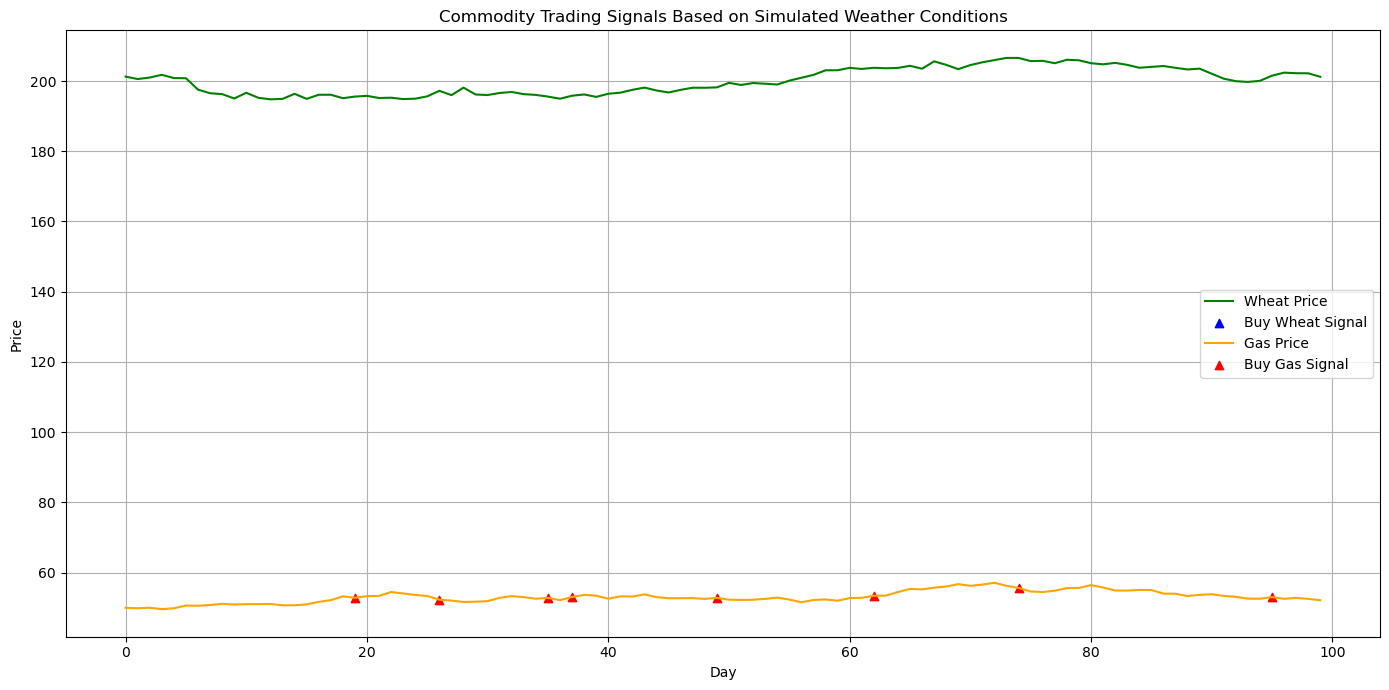

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulate 100 days of weather data
np.random.seed(42)
days = 100
temperature = np.random.normal(loc=15, scale=10, size=days)  # Temperature in Celsius
rainfall = np.random.exponential(scale=5, size=days)          # Rainfall in mm
humidity = np.random.uniform(low=30, high=90, size=days)      # Humidity percentage

# Simulate prices of commodities (Wheat and Natural Gas)
wheat_price = 200 + np.cumsum(np.random.normal(0, 1, days))
gas_price = 50 + np.cumsum(np.random.normal(0, 0.5, days))

# Initialize trading signals
signals = []

# Define a more complex weather-based trading strategy
# Buy Wheat if:
#   - High temperature (>30°C)
#   - Low rainfall (<2mm)
#   - Low humidity (<40%) => higher drought risk
# Buy Gas if:
#   - Very low temperature (<5°C)
#   - High humidity (>70%) => perceived colder conditions
# Hold otherwise

for t, r, h in zip(temperature, rainfall, humidity):
    if t > 30 and r < 2 and h < 40:
        signals.append('BUY_WHEAT')
    elif t < 5 and h > 70:
        signals.append('BUY_GAS')
    else:
        signals.append('HOLD')

# Create a DataFrame to store the data
data = pd.DataFrame({
    'Temperature': temperature,
    'Rainfall': rainfall,
    'Humidity': humidity,
    'Wheat_Price': wheat_price,
    'Gas_Price': gas_price,
    'Signal': signals
})

# Display the first 10 rows to understand the data
print(data.head(10))

# Visualize the buy signals on the commodity price charts
buy_wheat = data[data['Signal'] == 'BUY_WHEAT']
buy_gas = data[data['Signal'] == 'BUY_GAS']

plt.figure(figsize=(14, 7))
plt.plot(data['Wheat_Price'], label='Wheat Price', color='green')
plt.scatter(buy_wheat.index, buy_wheat['Wheat_Price'], marker='^', color='blue', label='Buy Wheat Signal')
plt.plot(data['Gas_Price'], label='Gas Price', color='orange')
plt.scatter(buy_gas.index, buy_gas['Gas_Price'], marker='^', color='red', label='Buy Gas Signal')
plt.legend()
plt.title('Commodity Trading Signals Based on Simulated Weather Conditions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

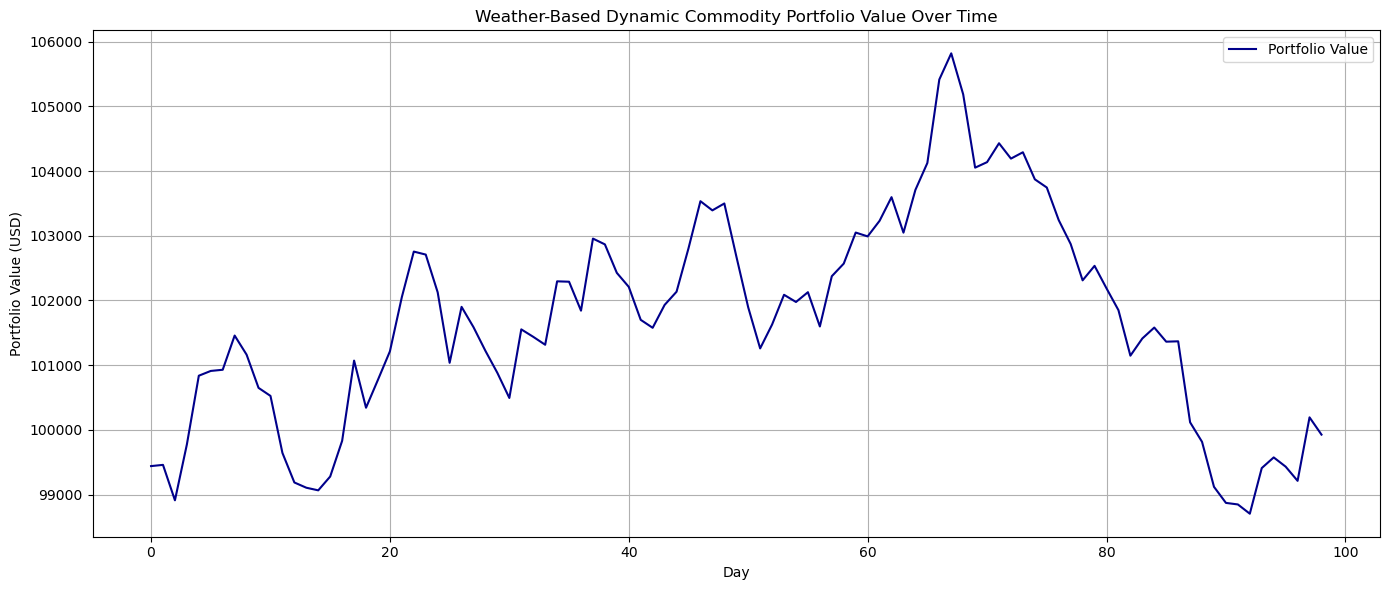

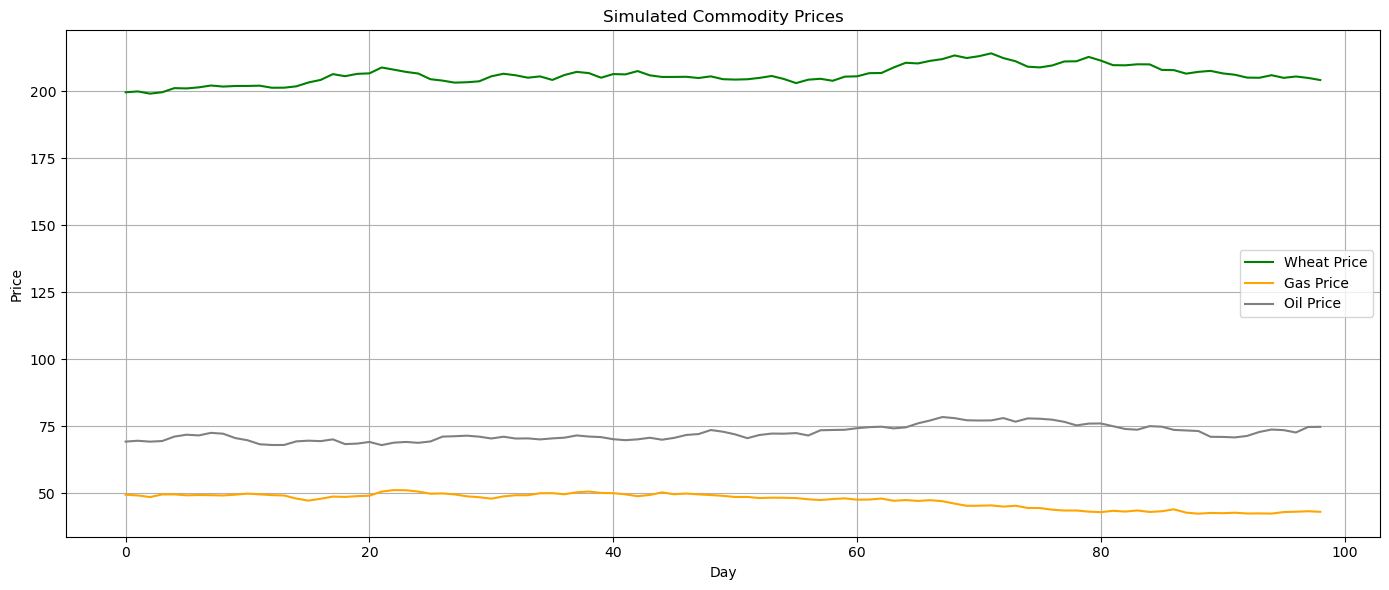

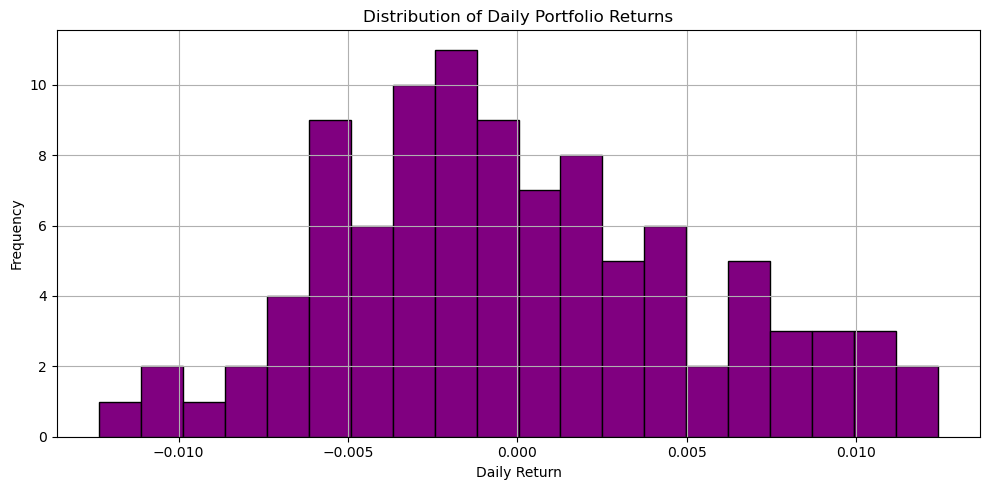

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulate 100 days of weather data
np.random.seed(42)
days = 100
temperature = np.random.normal(loc=15, scale=10, size=days)  # Temperature in Celsius
rainfall = np.random.exponential(scale=5, size=days)          # Rainfall in mm
humidity = np.random.uniform(low=30, high=90, size=days)      # Humidity percentage
wind_speed = np.random.normal(loc=10, scale=3, size=days)     # Wind speed in km/h

# Simulate commodity prices
wheat_price = 200 + np.cumsum(np.random.normal(0, 1, days))
gas_price = 50 + np.cumsum(np.random.normal(0, 0.5, days))
oil_price = 70 + np.cumsum(np.random.normal(0, 0.8, days))

# Strategy: Allocate capital dynamically based on weather conditions
# - If rainfall is increasing AND wind is strong -> Allocate more to oil (shipping issues)
# - If temperature is falling AND humidity rising -> Allocate to gas (heating demand)
# - If drought detected (high temp, low rainfall, low humidity) -> Allocate to wheat

capital = 100000  # Starting capital
allocations = []
returns = []

for i in range(1, days):
    wheat_signal = temperature[i] > 30 and rainfall[i] < 2 and humidity[i] < 40
    gas_signal = temperature[i] < 5 and humidity[i] > 70
    oil_signal = rainfall[i] > rainfall[i-1] and wind_speed[i] > 12

    # Initialize allocation percentages
    wheat_alloc = gas_alloc = oil_alloc = 0

    if wheat_signal:
        wheat_alloc = 0.6
        gas_alloc = 0.2
        oil_alloc = 0.2
    elif gas_signal:
        gas_alloc = 0.7
        wheat_alloc = 0.1
        oil_alloc = 0.2
    elif oil_signal:
        oil_alloc = 0.8
        wheat_alloc = 0.1
        gas_alloc = 0.1
    else:
        wheat_alloc = gas_alloc = oil_alloc = 1/3

    # Store allocations
    allocations.append((wheat_alloc, gas_alloc, oil_alloc))

    # Calculate daily returns
    wheat_r = (wheat_price[i] - wheat_price[i-1]) / wheat_price[i-1]
    gas_r = (gas_price[i] - gas_price[i-1]) / gas_price[i-1]
    oil_r = (oil_price[i] - oil_price[i-1]) / oil_price[i-1]
    
    portfolio_return = (wheat_alloc * wheat_r + gas_alloc * gas_r + oil_alloc * oil_r)
    returns.append(portfolio_return)

# Create DataFrame
portfolio_df = pd.DataFrame({
    'Temperature': temperature[1:],
    'Rainfall': rainfall[1:],
    'Humidity': humidity[1:],
    'WindSpeed': wind_speed[1:],
    'WheatPrice': wheat_price[1:],
    'GasPrice': gas_price[1:],
    'OilPrice': oil_price[1:],
    'DailyReturn': returns
})

# Compute cumulative returns
portfolio_df['CumulativeReturn'] = (1 + portfolio_df['DailyReturn']).cumprod() * capital

# Plot cumulative returns
plt.figure(figsize=(14, 6))
plt.plot(portfolio_df['CumulativeReturn'], label='Portfolio Value', color='darkblue')
plt.title('Weather-Based Dynamic Commodity Portfolio Value Over Time')
plt.xlabel('Day')
plt.ylabel('Portfolio Value (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot asset prices
plt.figure(figsize=(14, 6))
plt.plot(portfolio_df['WheatPrice'], label='Wheat Price', color='green')
plt.plot(portfolio_df['GasPrice'], label='Gas Price', color='orange')
plt.plot(portfolio_df['OilPrice'], label='Oil Price', color='gray')
plt.title('Simulated Commodity Prices')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Histogram of daily returns
plt.figure(figsize=(10, 5))
plt.hist(portfolio_df['DailyReturn'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Daily Portfolio Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()